In [1]:
#Starting Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkHouse").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/13 20:21:02 INFO SparkEnv: Registering MapOutputTracker
23/12/13 20:21:02 INFO SparkEnv: Registering BlockManagerMaster
23/12/13 20:21:02 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/13 20:21:02 INFO SparkEnv: Registering OutputCommitCoordinator


In [3]:
#Loading the data

path = 'gs://final-project-1002/cleaned_housing_data.csv'
file_type = "csv"

#CSV

infer_schema = 'true'
first_row_is_header = 'true'
delimeter = ','

#Import CSV

df = spark.read.format(file_type)\
    .option("inferSchema",infer_schema)\
    .option("header",first_row_is_header)\
    .option("seperater",delimeter)\
    .load(path)

In [4]:
#Printing the total number of rows in datase
total_rows = df.count()
print("Total number of rows:", total_rows)

Total number of rows: 596655


In [5]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Full_Market_Price: integer (nullable = true)
 |-- VAT_Exclusive: integer (nullable = true)
 |-- Description_of_Property: string (nullable = true)
 |-- Property_Type: string (nullable = true)



In [6]:
df.head() #Grabs the first row of the data

Row(Date='28/11/2018', Address='ABBEY GLEN, OFF POTTERY RD, CABINTEELY', County='Dublin', Price=14800000.0, Full_Market_Price=0, VAT_Exclusive=0, Description_of_Property='Second-Hand Dwelling house /Apartment', Property_Type='Second-Hand Dwelling house')

In [7]:
type(df.head())

pyspark.sql.types.Row

In [8]:
#selecting multiple columns
df.select('Date', 'County', 'Price', 'Property_Type').show()

+----------+--------+---------+--------------------+
|      Date|  County|    Price|       Property_Type|
+----------+--------+---------+--------------------+
|28/11/2018|  Dublin|   1.48E7|Second-Hand Dwell...|
|15/12/2016|  Dublin|  1.425E7|Second-Hand Dwell...|
|29/03/2013|  Dublin|    1.4E7|Second-Hand Dwell...|
|19/05/2021|  Dublin|  1.325E7|Second-Hand Dwell...|
|20/11/2019|Kilkenny|   1.26E7|Second-Hand Dwell...|
| 12/9/2022|  Dublin|   1.25E7|Second-Hand Dwell...|
|26/01/2022|  Dublin|    1.2E7|Second-Hand Dwell...|
|15/07/2021|   Laois|   1.15E7|Second-Hand Dwell...|
|25/05/2020|  Dublin|   1.15E7|Second-Hand Dwell...|
|  2/7/2021|  Dublin|  1.065E7|Second-Hand Dwell...|
|31/08/2015|  Dublin|    1.0E7|Second-Hand Dwell...|
| 12/8/2021|  Dublin|9910000.0|Second-Hand Dwell...|
|30/11/2022|  Dublin|9814000.0|Second-Hand Dwell...|
|10/10/2019|  Dublin|9750000.0|Second-Hand Dwell...|
|23/03/2021|  Dublin|9700000.0|Second-Hand Dwell...|
| 10/7/2017|  Dublin|9500000.0|Second-Hand Dwe

In [9]:
summary = df.select('Price').describe()
summary.show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|            596655|
|   mean|263757.10180610645|
| stddev| 267617.2424530576|
|    min|            5001.0|
|    max|            1.48E7|
+-------+------------------+



In [10]:
# Group by County, calculate the average price
average_prices_by_county = df.groupBy("County").agg({"Price": "avg"})

# Display the resulting DataFrame
average_prices_by_county.show()

+---------+------------------+
|   County|        avg(Price)|
+---------+------------------+
|    Clare|170122.15380861674|
|  Wexford|178360.62466461374|
|  Leitrim| 113647.9532067433|
|Roscommon| 116569.2242822499|
|   Dublin| 401442.4203836395|
| Limerick| 183314.5616886808|
|  Donegal|127959.55242153023|
|   Galway|217839.26965737515|
|   Offaly|155739.33565439383|
|     Cork|234648.85954056884|
|  Kildare| 282462.5135417836|
|Tipperary|151911.66714809064|
| Monaghan|143052.37795866717|
|  Wicklow| 336139.1197910674|
|     Mayo|138528.55718995628|
|    Meath|257577.98211810083|
|   Carlow|168386.35793638806|
|Westmeath|167708.33515431551|
|    Louth|196455.24315548415|
|    Sligo|146099.64075262786|
+---------+------------------+
only showing top 20 rows



In [11]:
df.head() #Grabs the first row of the data

Row(Date='28/11/2018', Address='ABBEY GLEN, OFF POTTERY RD, CABINTEELY', County='Dublin', Price=14800000.0, Full_Market_Price=0, VAT_Exclusive=0, Description_of_Property='Second-Hand Dwelling house /Apartment', Property_Type='Second-Hand Dwelling house')

In [12]:
from pyspark.sql.functions import col, split

# Split the "Date" column to extract year, month, and day
date_split = split(df["Date"], "/")

# Create new columns for year, month, and day
df = df.withColumn("Year", date_split.getItem(2).cast("int"))
df = df.withColumn("Month", date_split.getItem(1).cast("int"))
df = df.withColumn("Day", date_split.getItem(0).cast("int"))

# Display the resulting DataFrame
df.show()

+----------+--------------------+--------+---------+-----------------+-------------+-----------------------+--------------------+----+-----+---+
|      Date|             Address|  County|    Price|Full_Market_Price|VAT_Exclusive|Description_of_Property|       Property_Type|Year|Month|Day|
+----------+--------------------+--------+---------+-----------------+-------------+-----------------------+--------------------+----+-----+---+
|28/11/2018|ABBEY GLEN, OFF P...|  Dublin|   1.48E7|                0|            0|   Second-Hand Dwell...|Second-Hand Dwell...|2018|   11| 28|
|15/12/2016|WALFORD, SHREWSBU...|  Dublin|  1.425E7|                0|            0|   Second-Hand Dwell...|Second-Hand Dwell...|2016|   12| 15|
|29/03/2013|Walford, Shrewsbu...|  Dublin|    1.4E7|                0|            0|   Second-Hand Dwell...|Second-Hand Dwell...|2013|    3| 29|
|19/05/2021|Uimhi a Naoi, B�t...|  Dublin|  1.325E7|                0|            0|   Second-Hand Dwell...|Second-Hand Dwell...|2

In [13]:
# Group by County and calculate the sum of prices
county_prices = df.groupBy("County").agg({"Price": "sum"})

# Order by sum of prices in descending order
county_prices = county_prices.sort(col("sum(Price)").desc())

# Display the top 10 prices based on distinct counties
top_10_counties = county_prices.limit(10)
top_10_counties.show()

+--------+--------------------+
|  County|          sum(Price)|
+--------+--------------------+
|  Dublin|7.532304277900267E10|
|    Cork|1.528643460362989...|
| Kildare| 8.916211702459942E9|
|  Galway| 6.446953185510017E9|
| Wicklow| 6.419248770650014E9|
|   Meath| 6.272539020539991E9|
|Limerick|4.0664669219400063E9|
| Wexford|3.7066905017800026E9|
|   Louth| 3.173930908420002E9|
|   Kerry| 3.000881481169999E9|
+--------+--------------------+



<Figure size 1200x600 with 0 Axes>

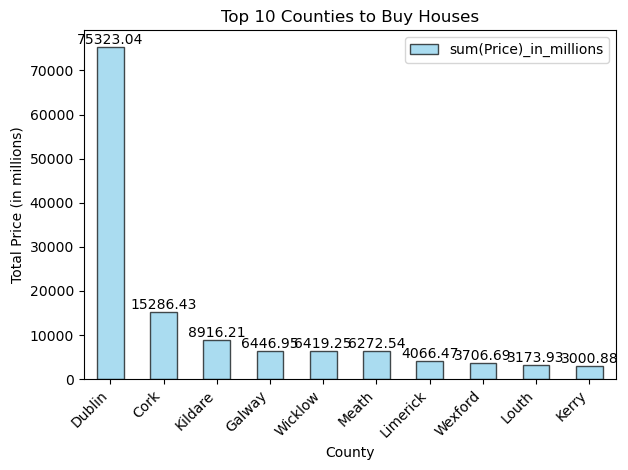

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for plotting
top_10_counties_pd = top_10_counties.toPandas()

# Convert the 'sum(Price)' column to millions
top_10_counties_pd['sum(Price)_in_millions'] = top_10_counties_pd['sum(Price)'] / 1e6

# Plotting using Matplotlib
plt.figure(figsize=(12, 6))
ax = top_10_counties_pd.plot(kind='bar', x='County', y='sum(Price)_in_millions', color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('County')
plt.ylabel('Total Price (in millions)')
plt.title('Top 10 Counties to Buy Houses')
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, value in enumerate(top_10_counties_pd['sum(Price)_in_millions']):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
# Show the plot
plt.show()


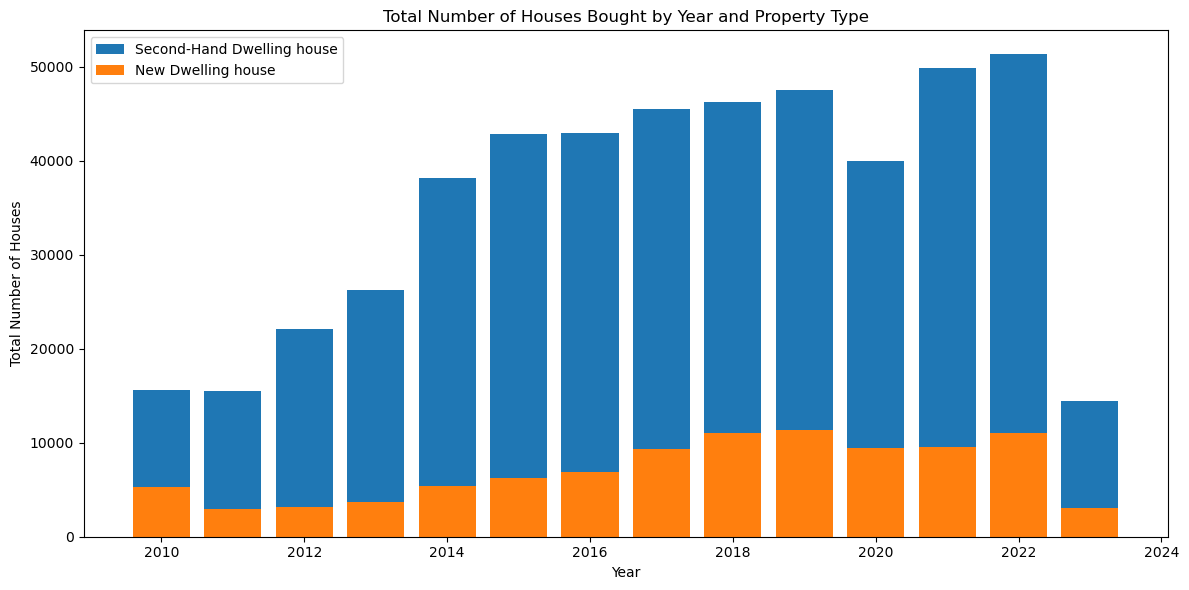

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Property_Type, and calculate the count for each group
houses_per_year_and_type = df.groupBy("Year", "Property_Type").agg({"Property_Type": "count"})

# Convert the Spark DataFrame to a Pandas DataFrame
houses_per_year_and_type_pd = houses_per_year_and_type.toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(12, 6))

# Iterate over unique property types
for house_type in houses_per_year_and_type_pd["Property_Type"].unique():
    subset = houses_per_year_and_type_pd[houses_per_year_and_type_pd["Property_Type"] == house_type]
    plt.bar(subset["Year"], subset["count(Property_Type)"], label=house_type)

plt.xlabel("Year")
plt.ylabel("Total Number of Houses")
plt.title("Total Number of Houses Bought by Year and Property Type")
plt.legend()
plt.tight_layout()  
plt.show()
